In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
f = open("graphP.txt")
edges = f.read().split('\n')
# edges

In [3]:
P = nx.Graph()

for edge in edges:
    if edge == '':
        continue
    e = edge.split('-')
    P.add_edge(int(e[0]), int(e[1]), weight=int(e[2]), color=e[3])



In [26]:
#GLOBAL VARIABLES
P_community_weights = P.copy()
P_girvan_newman = P.copy()
P_community_clique = P.copy()
weight_communities = None
num_comp = 24

In [5]:
def draw_P(graph):
    color_map = []
    color_options = ['#FF0000','#FF9999','#FF8000','#FFFF00','#80FF00','#009900','#66FFB2','#009999','#00FFFF','#004C99',
              '#66B2FF','#9999FF','#0000CC','#7F00FF','#FF00FF','#CC0066','#C0C0C0','#606060','#336600','#999900',
              '#CCCCFF','#CCFFFF','#FFCCFF','#666600']
    for node in graph:       
        mod = int(node) % 24
        color_map.append(color_options[mod])
    colors = [graph[u][v]['color'] for u,v in graph.edges()]
    plt.figure(figsize=(12,12))
    pos = graphviz_layout(graph, prog="fdp")
    nx.draw(graph,pos, node_color=color_map, edge_color=colors, with_labels = True)
    plt.show()
    plt.clf()
    
def draw_G(graph):
    color_map = []
    for node in graph:       
        node = graph.nodes[node]['state']
        if (node == 'State.RECOVERED'):
            color_map.append('green')
        else:
            color_map.append('red')
    pos = graphviz_layout(graph, prog="twopi")
    plt.figure(figsize=(10,10))
    nx.draw(graph,pos, node_color=color_map, with_labels = True)
    plt.show()
    plt.clf()

# COMMUNITY DETECTION

## ALGORITHMS

In [6]:
def community_detection_weight():  
    i=0
    edges=sorted(P_community_weights.edges(data=True), key=lambda t: t[2].get('weight', 1))
    while nx.number_connected_components(P_community_weights) < num_comp:
        e = edges[i]
        P_community_weights.remove_edge(e[0],e[1])
        i+=1
    components = sorted(nx.connected_components(P_community_weights), key=len, reverse=True)
    weight_communities = components


In [25]:
def girvan_newman():   
    ebP = nx.edge_betweenness_centrality(P_girvan_newman, weight="weight")
#     ebP = nx.edge_betweenness_centrality(P_girvan_newman)
    ebP = sorted(ebP.items(), key=lambda pair: -pair[1])
    i=0
    while nx.number_connected_components(P_girvan_newman) < num_comp:
        e = ebP[i][0]
        P_girvan_newman.remove_edge(e[0],e[1])
        i+=1

In [8]:
# def community_detection_clique():   
#     cliques = nx.find_cliques(P)
#     cliques = sorted(cliques, key=lambda c: -len(c))
#     print(cliques)
#     for c in cliques:
#         print(c)


In [9]:
def weight_community_stats():
    c = 0
    components_stats = []
    components = sorted(nx.connected_components(P_community_weights), key=len, reverse=True)
    weight_communities = components
    for x in weight_communities:
        comp = P_community_weights.subgraph(weight_communities[c])
        components_stats.append((comp.number_of_nodes(),comp.number_of_edges()))
        c+=1
        nodes = []
        for node in comp:
            nodes.append(node)      
    print(components_stats)

## EXECUTION

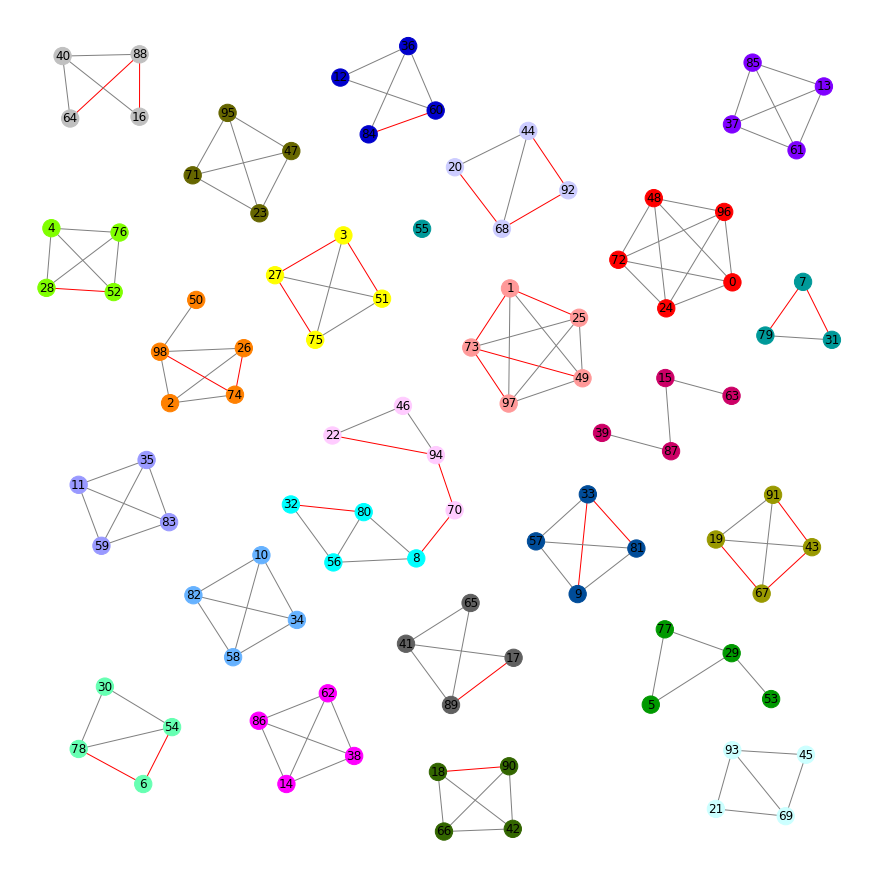

<Figure size 432x288 with 0 Axes>

In [10]:
community_detection_weight()
draw_P(P_community_weights)

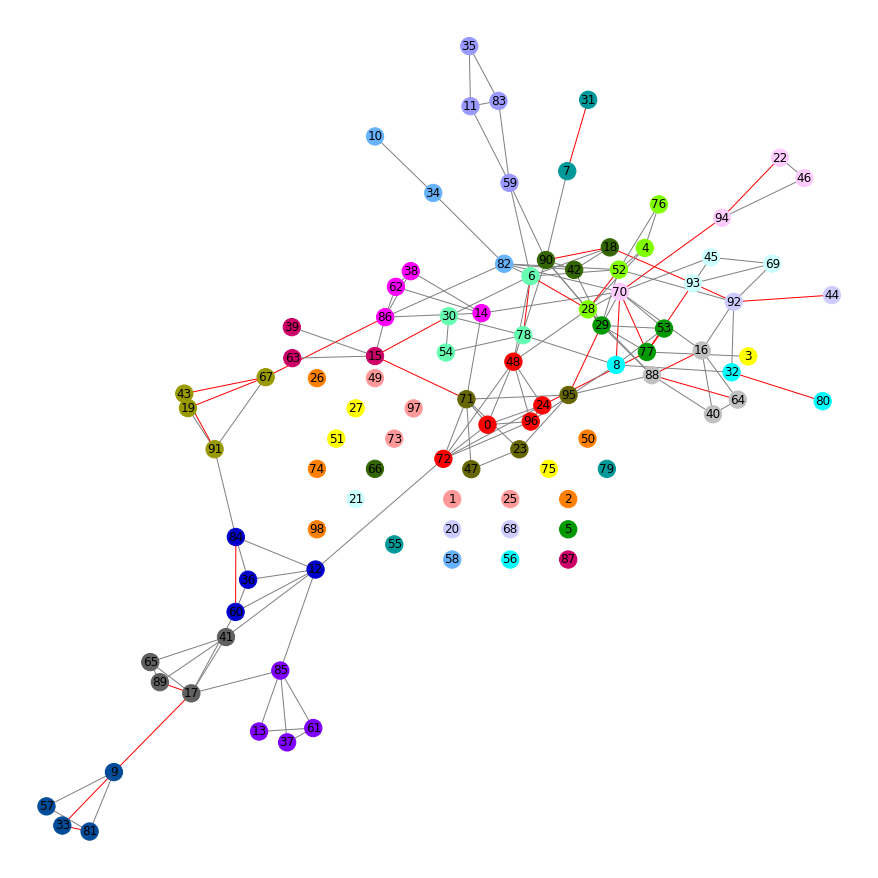

<Figure size 432x288 with 0 Axes>

In [27]:
girvan_newman()
draw_P(P_girvan_newman)

In [12]:
weight_community_stats()

[(8, 10), (5, 10), (5, 7), (5, 10), (4, 6), (4, 6), (4, 5), (4, 5), (4, 4), (4, 6), (4, 3), (4, 6), (4, 6), (4, 5), (4, 5), (4, 6), (4, 6), (4, 5), (4, 5), (4, 6), (4, 6), (4, 6), (3, 3), (1, 0)]


In [13]:
# community_detection_clique()

# LOAD GRAPH PROGRESSIONS

In [14]:
Ga = []
Pa = []
for x in range(1,7):
    x *= 850
    fp = open("images/graphP"+str(x)+".txt")
    fg = open("images/graphG"+str(x)+".txt")
    edges = fp.read().split('\n')
    p = nx.Graph()
    for edge in edges:
        if edge == '':
            continue
        e = edge.split('-')
        p.add_edge(int(e[0]), int(e[1]), weight=int(e[2]), color=e[3])
    edges = fg.read().split('\n')
    g = nx.DiGraph()
    for edge in edges:
        if edge == '':
            continue
        e = edge.split('-')
        g.add_edge(int(e[0]), int(e[1]))
        g.nodes[int(e[0])]['state'] = e[2]
        g.nodes[int(e[1])]['state'] = e[3]
    Ga.append(g)
    Pa.append(p)
        

In [30]:
# draw_P(Pa[1])

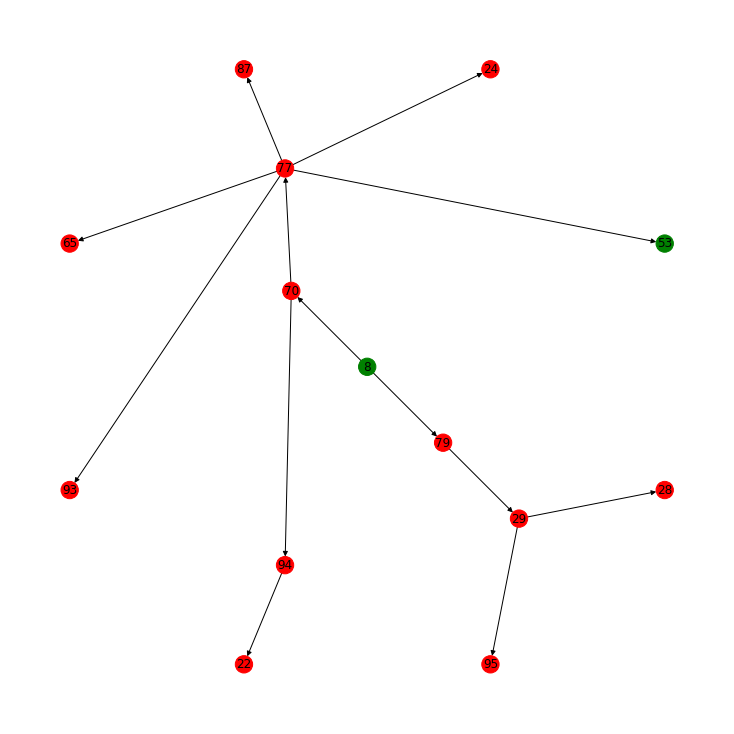

<Figure size 432x288 with 0 Axes>

In [32]:
draw_G(Ga[1])

# LINK PREDICTION

In [17]:
C = nx.Graph()
t0=0
t1=1
for x in Pa[t0]:
    friends_x = Pa[t0].neighbors(x)
    for z in friends_x:
        friends_z = Pa[t0].neighbors(z)
        for y in friends_z:
            if not(y == x or y in friends_x):
                if not C.has_edge(x, y):
                    C.add_edge(x,y)



new_edges = []

for e in Pa[t1].edges:
    if not (Pa[t0].has_edge(e[0],e[1])):
        new_edges.append(e)
len(new_edges)
# C.number_of_edges()
# len(t1_edges)-len(t0_edges)
# new_edges

58

In [18]:
rp = list(C.edges)
random.shuffle(rp)
# rp

In [19]:
common_neighbors = []
for e in C.edges:
    cn = len(sorted(nx.common_neighbors(Pa[t0],e[0],e[1])))
    common_neighbors.append((e[0],e[1],cn))
common_neighbors.sort(key=lambda x: x[2], reverse = True)
# common_neighbors

In [20]:
jc = nx.jaccard_coefficient(Pa[t0],list(C.edges))
jaccard_candidate_scores = sorted(jc)
jaccard_candidate_scores.sort(key=lambda x: x[2], reverse = True)
# jaccard_candidate_scores

In [21]:
pa = sorted(nx.preferential_attachment(Pa[t0],list(C.edges)))
pa.sort(key=lambda x: x[2], reverse = True)
# pa

In [22]:
aa = sorted(nx.adamic_adar_index(Pa[t0],list(C.edges)))
aa.sort(key=lambda x: x[2], reverse = True)
# aa

In [23]:
def precision_at_k(k):
    try:
        print('Random Predictor at k=' + str(k) + ':')
        precision = 0.0
        for x in range(k):
            if Pa[t1].has_edge(rp[x][0],rp[x][1]):
                precision += 1.0
        precision /= k
        print(str(round(precision*100,2)) + '%')
        print('Common Neighbors at k=' + str(k) + ':')
        precision = 0.0
        for x in range(k):
            if Pa[t1].has_edge(common_neighbors[x][0],common_neighbors[x][1]):
                precision += 1.0
        precision /= k
        print(str(round(precision*100,2)) + '%')
        print('Jaccard Coefficient at k=' + str(k) + ':')
        precision = 0.0
        for x in range(k):
            if Pa[t1].has_edge(jaccard_candidate_scores[x][0],jaccard_candidate_scores[x][1]):
                precision += 1.0
        precision /= k
        print(str(round(precision*100,2)) + '%')
        print('Preferential Attachment at k=' + str(k) + ':')
        precision = 0.0
        for x in range(k):
            if Pa[t1].has_edge(pa[x][0],pa[x][1]):
                precision += 1.0
        precision /= k
        print(str(round(precision*100,2)) + '%')
        print('Adamic/Adar at k=' + str(k) + ':')
        precision = 0.0
        for x in range(k):
            if Pa[t1].has_edge(aa[x][0],aa[x][1]):
                precision += 1.0
        precision /= k
        print(str(round((precision*100),2)) + '%')
        print('\n')
    except:
        return


In [24]:
k_vals = [10,20,50,75,100,200,500]
for k in k_vals:    
    precision_at_k(k)

Random Predictor at k=10:
50.0%
Common Neighbors at k=10:
100.0%
Jaccard Coefficient at k=10:
80.0%
Preferential Attachment at k=10:
70.0%
Adamic/Adar at k=10:
100.0%


Random Predictor at k=20:
45.0%
Common Neighbors at k=20:
75.0%
Jaccard Coefficient at k=20:
85.0%
Preferential Attachment at k=20:
35.0%
Adamic/Adar at k=20:
80.0%


Random Predictor at k=50:
46.0%
Common Neighbors at k=50:
58.0%
Jaccard Coefficient at k=50:
70.0%
Preferential Attachment at k=50:
28.0%
Adamic/Adar at k=50:
68.0%


Random Predictor at k=75:
45.33%
Common Neighbors at k=75:
49.33%
Jaccard Coefficient at k=75:
50.67%
Preferential Attachment at k=75:
41.33%
Adamic/Adar at k=75:
49.33%


Random Predictor at k=100:
Random Predictor at k=200:
Random Predictor at k=500:
